In [1]:
import networkx as nx
from networkx.readwrite.gml import write_gml, read_gml
from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms.community import lukes_partitioning
import json
import matplotlib.pyplot as plt

In [12]:
#Load data set
with open(r"courses_2021.json","r") as f:
    courses = json.load(f)
    

In [17]:
G = nx.Graph()

for c in courses:
    G.add_node(f'{c["faculty"]["code"]}_{c["code"]}',name=c["name"],
               faculty_name=c["faculty"]["name"],faculty_type=c["faculty"]["type"],candidates=c["candidates"])
for c in courses:
    for code in c["edges"].keys():
        G.add_edge(f'{c["faculty"]["code"]}_{c["code"]}',code,weight = c["edges"][code])
len([G.nodes[x] for x in G.nodes()])

1070

In [7]:
G.remove_nodes_from(list(nx.isolates(G)))
G.number_of_nodes()

1065

In [18]:
write_gml(G,"graph.gml")

In [22]:
comp = lukes_partitioning(G,20,edge_weight="weight")

NotATree: lukes_partitioning works only on trees

In [17]:
for c in communities:
    print(len(c))

1064
1


In [15]:
G.nodes[list(largest_cc)[0]]

{'candidates': 95,
 'faculty_name': 'Universidade da Madeira: Escola Superior de Tecnologias e Gestão',
 'faculty_type': 'politecnico',
 'name': 'Direção e Gestão Hoteleira'}

In [21]:
list(nx.bridges(G))

[('1202_9803', '3042_L175')]

In [41]:
a = nx.betweenness_centrality(G, weight='weight')

In [42]:
G.nodes[max(a,key=a.get)],a[max(a,key=a.get)]

({'candidates': 2377,
  'faculty_name': 'Universidade de Coimbra: Faculdade de Direito',
  'faculty_type': 'universidade',
  'name': 'Direito'},
 0.007195738855040254)

In [36]:
a[max(a)]

0.00043731029501939856

Text(0, 0.5, 'Frequency')

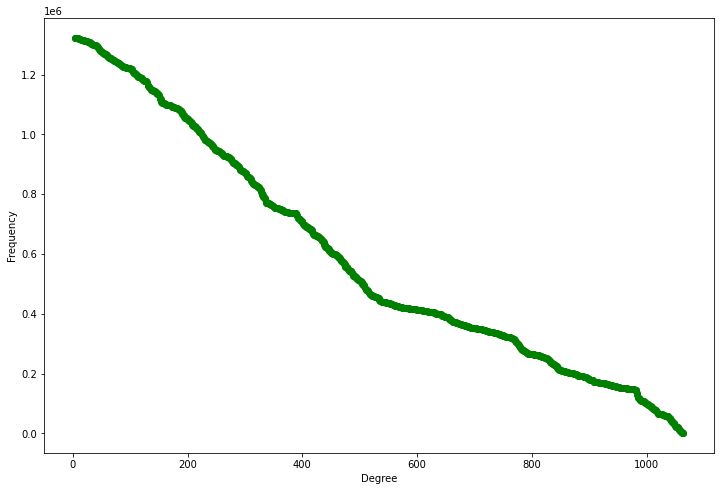

In [36]:
degree_freq = [G.degree(n,weight='weight') for n in G.nodes()]
degree_cum = [sum(degree_freq[i:]) for i in range(len(degree_freq))]
degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8)) 
plt.plot(degrees[3:], degree_cum[3:],'go-') 
plt.xlabel('Degree')
plt.ylabel('Frequency')